In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [11]:
# Define Employee class
class Employee:
    def __init__(self, name, id, wellbeing_status):
        self._name = name
        self._id = id
        self._wellbeing_status = wellbeing_status
        self._wellbeing_history = {}  # Dictionary to store wellbeing history

    def get_name(self):
        return self._name

    def get_id(self):
        return self._id

    def get_wellbeing_status(self):
        return self._wellbeing_status

    def set_wellbeing_status(self, status):
        self._wellbeing_status = status

    def add_wellbeing_history(self, day, status):
        self._wellbeing_history[day] = status

    def get_wellbeing_history(self):
        return self._wellbeing_history

In [12]:
# Define WellbeingProtocol class
class WellbeingProtocol:
    def __init__(self, protocol_name):
        self._protocol_name = protocol_name

    def apply_protocol(self, employee):
        # Subclass for this method
        pass

In [13]:
# Define SpecificWellbeingProtocol subclass
class SpecificWellbeingProtocol(WellbeingProtocol):
    def __init__(self, protocol_name):
        super().__init__(protocol_name)

    def apply_protocol(self, employee):
        # Implement the specific protocol for the employee
        pass


In [14]:
# Define Management class
class Management:
    def __init__(self):
        self._employees = []

    def add_employee(self, employee):
        self._employees.append(employee)

    def apply_wellbeing_protocol(self, protocol):
        for employee in self._employees:
            protocol.apply_protocol(employee)

    def get_employee_wellbeing_status(self, id):
        for employee in self._employees:
            if employee.get_id() == id:
                return employee.get_wellbeing_status()
        return None


In [15]:
# Generate example data
management = Management()
employee_names = ["Alice", "Bob", "Charlie", "David", "Emma"]
for i, name in enumerate(employee_names, start=1):
    employee = Employee(name, i, "Good")
    management.add_employee(employee)
    # Randomly generate wellbeing status for each day for each employee
    for day in range(1, 11):
        status = random.choice(["Poor", "Average", "Good", "Very Good", "Excellent"])
        employee.add_wellbeing_history(f"Day{day}", status)

In [16]:
# Convert the wellbeing history data to DataFrame for heatmap
data_dict = {employee.get_name(): employee.get_wellbeing_history() for employee in management._employees}
data = pd.DataFrame(data_dict).T.sort_index()

In [17]:
# Convert the categorical data to numerical for the heatmap
status_mapping = {"Poor": 0, "Average": 1, "Good": 2, "Very Good": 3, "Excellent": 4}
data_num = data.applymap(lambda x: status_mapping.get(x) if x in status_mapping else -1)


C:\Users\Aafi\AppData\Local\Temp\ipykernel_3420\2788522492.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_num = data.applymap(lambda x: status_mapping.get(x) if x in status_mapping else -1)


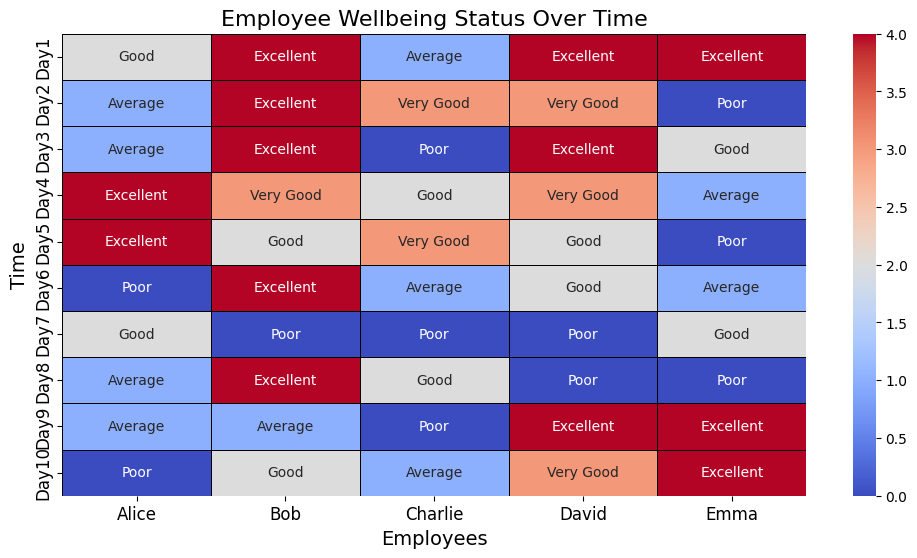

In [18]:
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data_num.T, annot=data.T, fmt="", cmap="coolwarm", cbar=True, linewidths=.5, linecolor='black', mask=(data_num.T == -1))
plt.title("Employee Wellbeing Status Over Time", fontsize=16)
plt.xlabel("Employees", fontsize=14)
plt.ylabel("Time", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()